# Matplotlib introduction



**Attribution**:

-   By Jonas Eschle and Rafael Silva Coutinho, based on the [tutorial](https://colab.research.google.com/github/ffund/ml-notebooks/blob/master/notebooks/1-python-numpy-tutorial.ipynb) by *Fraida Fund*

## Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular *libraries* (`numpy`, `pandas`, `matplotlib`) it becomes a powerful environment for scientific computing.

In this notebook, we will cover:

-   `matplotlib`: Basic Visualization, Subplots, Image Visualization

*Note that variables in these tutorials are often just a single letter, as the code written is about a line or two. For anything more general, proper names are used and should always be used*

## Matplotlib

Matplotlib is a plotting library. In this section we give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

By convention, we typically import this module using the `plt` alias:

In [130]:
import matplotlib.pyplot as plt

### Plotting

The most important function in `matplotlib` is `plot`, which allows you to plot 2D data as a line plot. Here is a simple example:

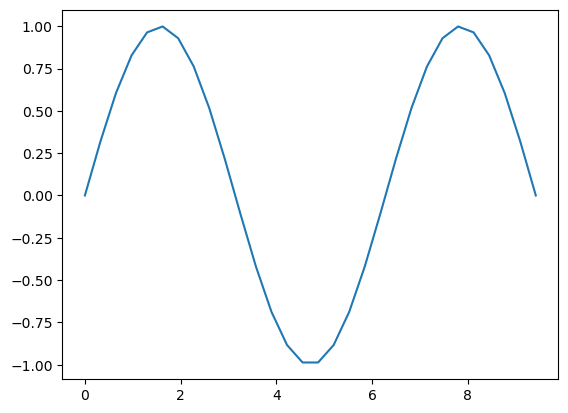

In [131]:
# Compute the x and y coordinates for points on a sine curve
x = np.linspace(0, 3 * np.pi, 30)
y = np.sin(x)

# Plot the points using matplotlib
plt.figure()  # create a new figure
plt.plot(x, y)

# Show the figure.
plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

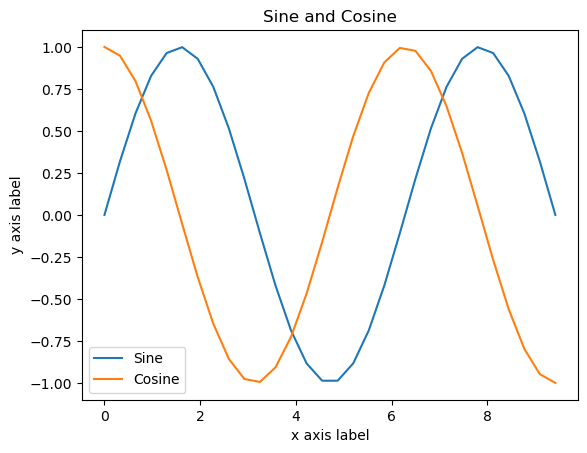

In [132]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.figure()
plt.plot(x, y_sin, label='Sine')
plt.plot(x, y_cos, label='Cosine')
plt.legend() # uses the label arguments given above

plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')

# Show the figure.
plt.show()

Another useful, basic, plot is the `scatter` plot. Using `plt.savefig(filepath)`, we can save a figure.

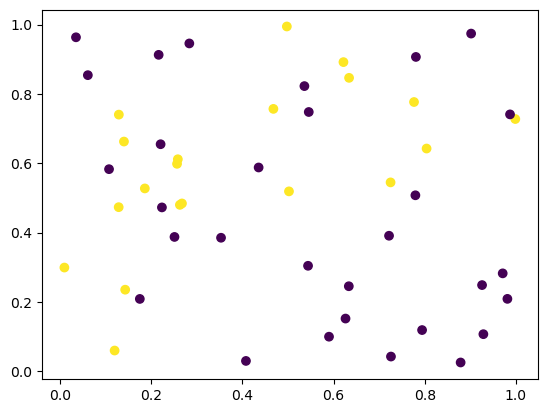

In [133]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.randint(0, 2, 50)

plt.figure()
plt.scatter(x, y, c=colors)

plt.savefig("scatter_example.png")

plt.show()

When there is no logical connection between adjacent points (for example: if the horizontal axis is a categorical variable without a logical order), then you should *not* connect them (as in a line plot), since this implies a relationship that does not exist! Instead, you would use a scatter plot.

### Subplots

You can plot different things in the same figure using the `subplot` function. Here is an example:

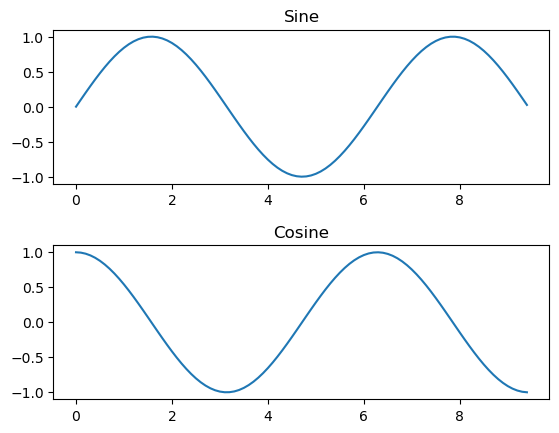

In [134]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.figure()
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Adjust spacing between subplots
plt.subplots_adjust(hspace = 0.4)

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

Creating a histogram and plotting it can be done using the `hist` function:

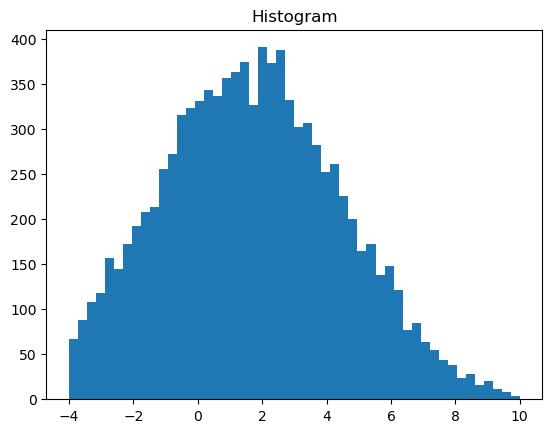

In [135]:
data = np.random.normal(loc=1.5, scale=3, size=10_000)

plt.figure()
plt.hist(data, bins=50, range=(-4, 10))  # bins and range are optional
plt.title("Histogram")

plt.show()

You can use the `imshow` function to display images from a file. Here is an example:

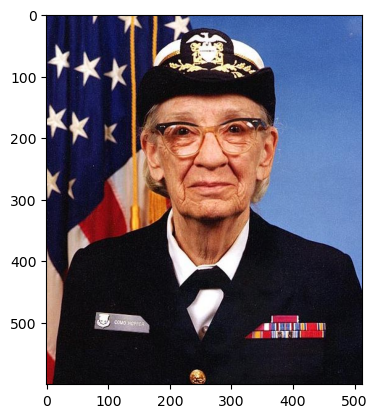

In [136]:
from matplotlib.cbook import get_sample_data

img_file = get_sample_data('grace_hopper.jpg')

plt.figure()
img = plt.imread(img_file)
plt.imshow(img)
plt.show()

The `matplotlib` library is very flexible, and you can create virtually any plot and modify its appearance in any way you might think of. If you don’t like the way your plot looks, fix it! Use the [documentation](http://matplotlib.org/api/pyplot_api.html) to learn more.

**Exericse**

1. Create a dataset consisting of 10'000 points that is normally distributed with a mean of 10 and a width of 2.
2. Copy-and-paste the function `normal_dist` you've created in the previous numpy tutorial
3. Plot the distribution  (_hint_: use `np.linspace`, choose a reasonable lower and upper bound and number of elements to get x, and use `normal_dist` with this array).
4. Plot it as a histogram and use `density=True` (in the same figure, i.e. in the same cell). Use an appropriate number of bins (e.g. 50).
5. Extend it and replot (just execute the cell again)! Add a title, xlabel, ylabel, label for the function etc.


In [1]:
import numpy as np

**Solution**

In [4]:
data = np.random.normal(loc=10, scale=2, size=10_000)

In [13]:
def normal_dist(x, mean, width):
    """Normal distribution evaluted on `x` with `mean` and `width`
    
    The normal distribution is defined as 
    
    .. math:
    
        f(x) = \frac{1}{\sigma \sqrt(2 \pi)} \exp{- 0.5 (\frac{x - \mu}{ \sigma}) ^ 2}
       
    with :math:`\mu` the mean and :math:`\sigma` the width.
    
    """
    factor = 1 / (width * np.sqrt(2 * np.pi))
    exponent = - 0.5 * ((x - mean) / width) ** 2
    return factor * np.exp(exponent)

In [10]:
x = np.linspace(1, 20, num=200)
y = normal_dist(x, mean=10, width=2)

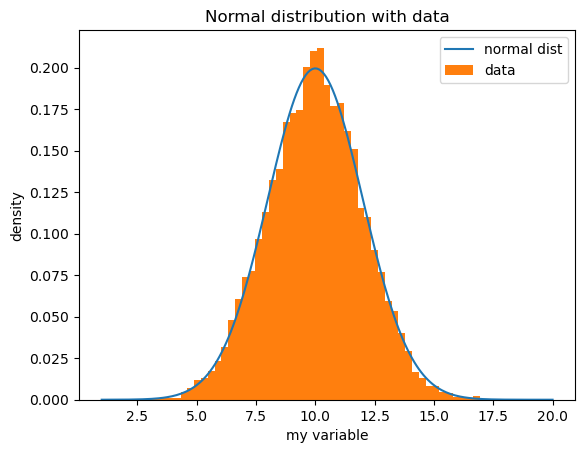

In [14]:
plt.figure()
plt.title("Normal distribution with data")
plt.plot(x, y, label="normal dist")
plt.hist(data, bins=50, density=True, label="data")

plt.xlabel("my variable")
plt.ylabel("density")
plt.legend()
